In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train.drop('PassengerId',axis=1,inplace=True)

In [6]:
len(train)

8693

In [7]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
len(train.dropna())

6606

In [9]:
(6606/8693)*100

75.99217761417232

### Deleting null values is not a good idea, we are lossing around 25% data.

In [10]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


<AxesSubplot:xlabel='Transported', ylabel='Age'>

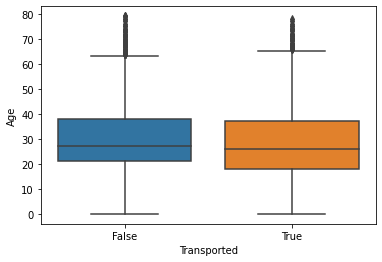

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='Transported',y='Age',data=train)

In [13]:
train['Age'].fillna(int(train['Age'].mode()),inplace=True)

<AxesSubplot:xlabel='Transported', ylabel='Age'>

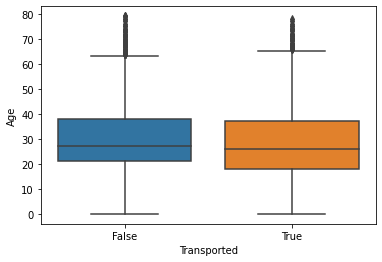

In [14]:
sns.boxplot(x='Transported',y='Age',data=train)

In [15]:
test['Age'].fillna(int(test['Age'].mode()),inplace=True)

### List of Numerical variables:
Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck

In [16]:
train[['RoomService']].isnull().sum()

RoomService    181
dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

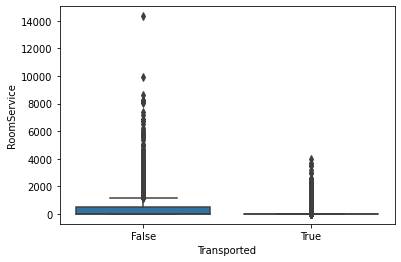

In [17]:
sns.boxplot(x='Transported',y='RoomService',data=train)

In [18]:
train['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [19]:

train['RoomService'].fillna(0,inplace=True)

In [20]:
test['RoomService'].describe()

count     4195.000000
mean       219.266269
std        607.011289
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      11567.000000
Name: RoomService, dtype: float64

In [21]:
test['RoomService'].fillna(0,inplace=True)

In [22]:
train['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [23]:
train['FoodCourt'].fillna(0,inplace=True)

In [24]:
train['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [25]:
train['ShoppingMall'].fillna(0,inplace=True)

In [26]:
train['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [27]:
train['Spa'].fillna(0,inplace=True)

In [28]:
train['VRDeck'].describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [29]:
train['VRDeck'].fillna(0,inplace=True)

In [30]:
test['ShoppingMall'].describe()

count    4179.000000
mean      177.295525
std       560.821123
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max      8292.000000
Name: ShoppingMall, dtype: float64

In [31]:
test['FoodCourt'].describe()

count     4171.000000
mean       439.484296
std       1527.663045
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      25273.000000
Name: FoodCourt, dtype: float64

In [32]:
test['Spa'].describe()

count     4176.000000
mean       303.052443
std       1117.186015
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      19844.000000
Name: Spa, dtype: float64

In [33]:
test['VRDeck'].describe()

count     4197.000000
mean       310.710031
std       1246.994742
min          0.000000
25%          0.000000
50%          0.000000
75%         36.000000
max      22272.000000
Name: VRDeck, dtype: float64

In [34]:
test['VRDeck'].fillna(0,inplace=True)
test['Spa'].fillna(0,inplace=True)
test['FoodCourt'].fillna(0,inplace=True)
test['ShoppingMall'].fillna(0,inplace=True)

In [35]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [36]:
train['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [37]:
train.drop('Name',axis=1,inplace=True)

In [38]:
test.drop('Name',axis=1,inplace=True)

In [39]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [40]:
test['VIP'].describe()

count      4184
unique        2
top       False
freq       4110
Name: VIP, dtype: object

In [41]:
train['VIP'].describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

In [42]:
train['VIP'].value_counts().index[0]

False

In [43]:
most_freq_train = train['VIP'].value_counts().index[0]
most_freq_test = test['VIP'].value_counts().index[0]
train['VIP'].fillna(most_freq_train,inplace=True)
test['VIP'].fillna(most_freq_test,inplace=True)

In [44]:
train['HomePlanet'].fillna('None', inplace=True)
train['CryoSleep'].fillna(False, inplace=True)
train['Cabin'].fillna('A/-1/A', inplace=True)
train['Destination'].fillna('None', inplace=True)

In [45]:
test['HomePlanet'].fillna('None', inplace=True)
test['CryoSleep'].fillna(False, inplace=True)
test['Cabin'].fillna('A/-1/A', inplace=True)
test['Destination'].fillna('None', inplace=True)

In [46]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [47]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [48]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


### Feature Scaling

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 636.8+ KB


In [50]:
from sklearn.preprocessing import RobustScaler
transformer_Age = RobustScaler().fit(train[['Age']])
val=transformer_Age.transform(train[['Age']])
train['Age']=val

In [51]:
transformer_RoomService = RobustScaler().fit(train[['RoomService']])
val=transformer_RoomService.transform(train[['RoomService']])
train['RoomService']=val

In [52]:
transformer_FoodCourt = RobustScaler().fit(train[['FoodCourt']])
val=transformer_FoodCourt.transform(train[['FoodCourt']])
train['FoodCourt']=val

In [53]:
transformer_ShoppingMall = RobustScaler().fit(train[['ShoppingMall']])
val=transformer_ShoppingMall.transform(train[['ShoppingMall']])
train['ShoppingMall']=val

In [54]:
transformer_Spa = RobustScaler().fit(train[['Spa']])
val=transformer_Spa.transform(train[['Spa']])
train['Spa']=val

In [55]:
transformer_VRDeck = RobustScaler().fit(train[['VRDeck']])
val=transformer_VRDeck.transform(train[['VRDeck']])
train['VRDeck']=val

In [56]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.705882,False,0.000000,0.000000,0.000000,0.000000,0.000,False
1,Earth,False,F/0/S,TRAPPIST-1e,-0.176471,False,2.658537,0.147541,1.136364,10.358491,1.100,True
2,Europa,False,A/0/S,TRAPPIST-1e,1.823529,True,1.048780,58.622951,0.000000,126.698113,1.225,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.352941,False,0.000000,21.032787,16.863636,62.811321,4.825,False
4,Earth,False,F/1/S,TRAPPIST-1e,-0.647059,False,7.390244,1.147541,6.863636,10.660377,0.050,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.823529,True,0.000000,111.786885,0.000000,31.000000,1.850,False
8689,Earth,True,G/1499/S,PSO J318.5-22,-0.529412,False,0.000000,0.000000,0.000000,0.000000,0.000,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,-0.058824,False,0.000000,0.000000,85.090909,0.018868,0.000,True
8691,Europa,False,E/608/S,55 Cancri e,0.294118,False,0.000000,17.196721,0.000000,6.660377,80.875,False


In [57]:
transformer_VRDeck = RobustScaler().fit(test[['VRDeck']])
val=transformer_VRDeck.transform(test[['VRDeck']])
test['VRDeck']=val

transformer_Spa = RobustScaler().fit(test[['Spa']])
val=transformer_Spa.transform(test[['Spa']])
test['Spa']=val

transformer_ShoppingMall = RobustScaler().fit(test[['ShoppingMall']])
val=transformer_ShoppingMall.transform(test[['ShoppingMall']])
test['ShoppingMall']=val


transformer_FoodCourt = RobustScaler().fit(test[['FoodCourt']])
val=transformer_FoodCourt.transform(test[['FoodCourt']])
test['FoodCourt']=val

transformer_RoomService = RobustScaler().fit(test[['RoomService']])
val=transformer_RoomService.transform(test[['RoomService']])
test['RoomService']=val

from sklearn.preprocessing import RobustScaler
transformer_Age = RobustScaler().fit(test[['Age']])
val=transformer_Age.transform(test[['Age']])
test['Age']=val


train

In [58]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
None              182
Name: Destination, dtype: int64

In [59]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.705882,False,0.000000,0.000000,0.000000,0.000000,0.000,False
1,Earth,False,F/0/S,TRAPPIST-1e,-0.176471,False,2.658537,0.147541,1.136364,10.358491,1.100,True
2,Europa,False,A/0/S,TRAPPIST-1e,1.823529,True,1.048780,58.622951,0.000000,126.698113,1.225,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.352941,False,0.000000,21.032787,16.863636,62.811321,4.825,False
4,Earth,False,F/1/S,TRAPPIST-1e,-0.647059,False,7.390244,1.147541,6.863636,10.660377,0.050,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.823529,True,0.000000,111.786885,0.000000,31.000000,1.850,False
8689,Earth,True,G/1499/S,PSO J318.5-22,-0.529412,False,0.000000,0.000000,0.000000,0.000000,0.000,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,-0.058824,False,0.000000,0.000000,85.090909,0.018868,0.000,True
8691,Europa,False,E/608/S,55 Cancri e,0.294118,False,0.000000,17.196721,0.000000,6.660377,80.875,False


In [60]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
None       201
Name: HomePlanet, dtype: int64

In [61]:
train['CryoSleep'].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [62]:
train['Cabin'].value_counts()

A/-1/A     199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64

In [63]:
def extract_deck(s):
    return s.split('/')[0]

def extract_num(s):
    return s.split('/')[1]

def extract_side(s):
    return s.split('/')[2]

train['Deck'] = train['Cabin'].apply(extract_deck)
train['Num'] = train['Cabin'].apply(extract_num)
train['Side'] = train['Cabin'].apply(extract_side)

test['Deck'] = test['Cabin'].apply(extract_deck)
test['Num'] = test['Cabin'].apply(extract_num)
test['Side'] = test['Cabin'].apply(extract_side)

In [64]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [65]:
train['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     455
T       5
Name: Deck, dtype: int64

In [66]:
train['Num'].value_counts()

-1      199
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: Num, Length: 1818, dtype: int64

In [67]:
train['Num']=train['Num'].astype('int')

In [68]:
train['Num'].describe()

count    8693.000000
mean      586.601173
std       513.906241
min        -1.000000
25%       152.000000
50%       407.000000
75%       983.000000
max      1894.000000
Name: Num, dtype: float64

In [69]:
transformer_Num = RobustScaler().fit(train[['Num']])
val=transformer_Num.transform(train[['Num']])
train['Num']=val

transformer_Num = RobustScaler().fit(test[['Num']])
val=transformer_Num.transform(test[['Num']])
test['Num']=val

In [70]:
test['Num']=test['Num'].astype('int')

<AxesSubplot:xlabel='Transported', ylabel='Num'>

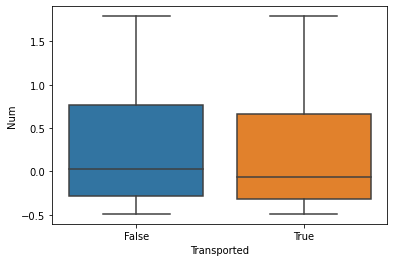

In [71]:
sns.boxplot(x='Transported',y='Num',data=train)

In [72]:
train['Side'].value_counts()

S    4288
P    4206
A     199
Name: Side, dtype: int64

In [73]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
None              182
Name: Destination, dtype: int64

In [74]:
train['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [75]:
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,0.055556,False,0.000000,0.000000,0.000000,0.000000,0.000000,G,0,S
1,0018_01,Earth,False,TRAPPIST-1e,-0.388889,False,0.000000,0.136364,0.000000,65.651163,0.000000,F,0,S
2,0019_01,Europa,True,55 Cancri e,0.277778,False,0.000000,0.000000,0.000000,0.000000,0.000000,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,0.666667,False,0.000000,100.787879,0.000000,4.209302,18.870968,C,0,S
4,0023_01,Earth,False,TRAPPIST-1e,-0.333333,False,0.208333,0.000000,23.518519,0.000000,0.000000,F,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,G,1,S
4273,9269_01,Earth,False,TRAPPIST-1e,0.888889,False,0.000000,12.833333,0.629630,0.232558,4.645161,A,0,A
4274,9271_01,Mars,True,55 Cancri e,-0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,D,0,P
4275,9273_01,Europa,False,None,-0.444444,False,0.000000,40.606061,0.000000,0.000000,16.870968,D,0,P


In [76]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,0.705882,False,0.000000,0.000000,0.000000,0.000000,0.000,False,B,-0.489771,P
1,Earth,False,TRAPPIST-1e,-0.176471,False,2.658537,0.147541,1.136364,10.358491,1.100,True,F,-0.489771,S
2,Europa,False,TRAPPIST-1e,1.823529,True,1.048780,58.622951,0.000000,126.698113,1.225,False,A,-0.489771,S
3,Europa,False,TRAPPIST-1e,0.352941,False,0.000000,21.032787,16.863636,62.811321,4.825,False,A,-0.489771,S
4,Earth,False,TRAPPIST-1e,-0.647059,False,7.390244,1.147541,6.863636,10.660377,0.050,True,F,-0.488568,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.823529,True,0.000000,111.786885,0.000000,31.000000,1.850,False,A,-0.371841,P
8689,Earth,True,PSO J318.5-22,-0.529412,False,0.000000,0.000000,0.000000,0.000000,0.000,False,G,1.314079,S
8690,Earth,False,TRAPPIST-1e,-0.058824,False,0.000000,0.000000,85.090909,0.018868,0.000,True,G,1.315283,S
8691,Europa,False,55 Cancri e,0.294118,False,0.000000,17.196721,0.000000,6.660377,80.875,False,E,0.241877,S


In [77]:
#cols=['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck','Num', 'Side']
cols=[ 'Deck','Side']

In [78]:
train1=train.copy()

In [79]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [80]:
data = pd.concat([train[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck',
       'Num', 'Side']], test])
features_cat = ['HomePlanet','CryoSleep' ,'Destination', 'VIP', 'Side','Deck']
for feature in cols:
    data[pd.get_dummies(data[feature], prefix=feature).columns] = pd.get_dummies(data[feature], prefix=feature)

In [81]:
data['Destination'] = data['Destination'].map({'55 Cancri e': 0, 'PSO J318.5-22': 1,
                                                   'TRAPPIST-1e': 2, 'None': 3})

In [82]:
data['HomePlanet'] = data['HomePlanet'].map({'Earth': 0, 'Europa': 1,
                                                 'Mars': 2, 'None': 3})

In [83]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_A,Side_P,Side_S
0,1,False,2,0.705882,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,1,0
1,0,False,2,-0.176471,False,2.658537,0.147541,1.136364,10.358491,1.100000,...,0,0,0,0,1,0,0,0,0,1
2,1,False,2,1.823529,True,1.048780,58.622951,0.000000,126.698113,1.225000,...,0,0,0,0,0,0,0,0,0,1
3,1,False,2,0.352941,False,0.000000,21.032787,16.863636,62.811321,4.825000,...,0,0,0,0,0,0,0,0,0,1
4,0,False,2,-0.647059,False,7.390244,1.147541,6.863636,10.660377,0.050000,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
4273,0,False,2,0.888889,False,0.000000,12.833333,0.629630,0.232558,4.645161,...,0,0,0,0,0,0,0,1,0,0
4274,2,True,0,-0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
4275,1,False,3,-0.444444,False,0.000000,40.606061,0.000000,0.000000,16.870968,...,0,0,1,0,0,0,0,0,1,0


In [84]:
data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side',
       'PassengerId', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_A', 'Side_P', 'Side_S'],
      dtype='object')

In [85]:
data.drop(['Deck', 'Side'], axis=1, inplace=True)

In [86]:
X = data[:len(train)]
y = train['Transported']

In [87]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_A,Side_P,Side_S
0,1,False,2,0.705882,False,0.000000,0.000000,0.000000,0.000000,0.000,...,1,0,0,0,0,0,0,0,1,0
1,0,False,2,-0.176471,False,2.658537,0.147541,1.136364,10.358491,1.100,...,0,0,0,0,1,0,0,0,0,1
2,1,False,2,1.823529,True,1.048780,58.622951,0.000000,126.698113,1.225,...,0,0,0,0,0,0,0,0,0,1
3,1,False,2,0.352941,False,0.000000,21.032787,16.863636,62.811321,4.825,...,0,0,0,0,0,0,0,0,0,1
4,0,False,2,-0.647059,False,7.390244,1.147541,6.863636,10.660377,0.050,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0.823529,True,0.000000,111.786885,0.000000,31.000000,1.850,...,0,0,0,0,0,0,0,0,1,0
8689,0,True,1,-0.529412,False,0.000000,0.000000,0.000000,0.000000,0.000,...,0,0,0,0,0,1,0,0,0,1
8690,0,False,2,-0.058824,False,0.000000,0.000000,85.090909,0.018868,0.000,...,0,0,0,0,0,1,0,0,0,1
8691,1,False,0,0.294118,False,0.000000,17.196721,0.000000,6.660377,80.875,...,0,0,0,1,0,0,0,0,0,1


In [88]:
x_test= data[len(train):]


In [89]:
x_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_A,Side_P,Side_S
0,0,True,2,0.055556,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
1,0,False,2,-0.388889,False,0.000000,0.136364,0.000000,65.651163,0.000000,...,0,0,0,0,1,0,0,0,0,1
2,1,True,0,0.277778,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
3,1,False,2,0.666667,False,0.000000,100.787879,0.000000,4.209302,18.870968,...,0,1,0,0,0,0,0,0,0,1
4,0,False,2,-0.333333,False,0.208333,0.000000,23.518519,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
4273,0,False,2,0.888889,False,0.000000,12.833333,0.629630,0.232558,4.645161,...,0,0,0,0,0,0,0,1,0,0
4274,2,True,0,-0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
4275,1,False,3,-0.444444,False,0.000000,40.606061,0.000000,0.000000,16.870968,...,0,0,1,0,0,0,0,0,1,0


In [90]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_A,Side_P,Side_S
0,1,False,2,0.705882,False,0.000000,0.000000,0.000000,0.000000,0.000,...,1,0,0,0,0,0,0,0,1,0
1,0,False,2,-0.176471,False,2.658537,0.147541,1.136364,10.358491,1.100,...,0,0,0,0,1,0,0,0,0,1
2,1,False,2,1.823529,True,1.048780,58.622951,0.000000,126.698113,1.225,...,0,0,0,0,0,0,0,0,0,1
3,1,False,2,0.352941,False,0.000000,21.032787,16.863636,62.811321,4.825,...,0,0,0,0,0,0,0,0,0,1
4,0,False,2,-0.647059,False,7.390244,1.147541,6.863636,10.660377,0.050,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0.823529,True,0.000000,111.786885,0.000000,31.000000,1.850,...,0,0,0,0,0,0,0,0,1,0
8689,0,True,1,-0.529412,False,0.000000,0.000000,0.000000,0.000000,0.000,...,0,0,0,0,0,1,0,0,0,1
8690,0,False,2,-0.058824,False,0.000000,0.000000,85.090909,0.018868,0.000,...,0,0,0,0,0,1,0,0,0,1
8691,1,False,0,0.294118,False,0.000000,17.196721,0.000000,6.660377,80.875,...,0,0,0,1,0,0,0,0,0,1


In [91]:
x_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_A,Side_P,Side_S
0,0,True,2,0.055556,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
1,0,False,2,-0.388889,False,0.000000,0.136364,0.000000,65.651163,0.000000,...,0,0,0,0,1,0,0,0,0,1
2,1,True,0,0.277778,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
3,1,False,2,0.666667,False,0.000000,100.787879,0.000000,4.209302,18.870968,...,0,1,0,0,0,0,0,0,0,1
4,0,False,2,-0.333333,False,0.208333,0.000000,23.518519,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
4273,0,False,2,0.888889,False,0.000000,12.833333,0.629630,0.232558,4.645161,...,0,0,0,0,0,0,0,1,0,0
4274,2,True,0,-0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
4275,1,False,3,-0.444444,False,0.000000,40.606061,0.000000,0.000000,16.870968,...,0,0,1,0,0,0,0,0,1,0


In [92]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   bool   
 2   Destination   4277 non-null   int64  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   bool   
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Num           4277 non-null   float64
 11  PassengerId   4277 non-null   object 
 12  Deck_A        4277 non-null   uint8  
 13  Deck_B        4277 non-null   uint8  
 14  Deck_C        4277 non-null   uint8  
 15  Deck_D        4277 non-null   uint8  
 16  Deck_E        4277 non-null   uint8  
 17  Deck_F        4277 non-null   uint8  
 18  Deck_G        4277 non-null 

In [93]:
X.drop(['PassengerId'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Num           8693 non-null   float64
 11  Deck_A        8693 non-null   uint8  
 12  Deck_B        8693 non-null   uint8  
 13  Deck_C        8693 non-null   uint8  
 14  Deck_D        8693 non-null   uint8  
 15  Deck_E        8693 non-null   uint8  
 16  Deck_F        8693 non-null   uint8  
 17  Deck_G        8693 non-null   uint8  
 18  Deck_T        8693 non-null 

In [95]:
x_test.drop('PassengerId',axis=1,inplace=True)

# Model

In [96]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, 
                                                       y,test_size =0.20)

In [97]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
criterion=['gini', 'entropy']
# Maximum number of levels in tree
max_depth=[3,4,5,6,7,8,9,10,11,12],
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [98]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_micro',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min


[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=log2, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=log2, bootstrap=True, total=  18.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=log2, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=log2, bootstrap=False, total=   4.2s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=4, max_features=auto, bootstrap=True, total=  11.6s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, bootstrap=True, total=  13.5s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=1600, min_samples_s

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.1min


[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=log2, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=log2, bootstrap=True, total=  18.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=log2, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=log2, bootstrap=False, total=   4.2s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=4, max_features=auto, bootstrap=True, total=  11.5s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, bootstrap=False, total=  24.7s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=auto, bootstrap=False 
[CV]  n_estimators=1600, min_sampl

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.9min finished


In [99]:
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, scoring='f1_micro',
                   verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'bootstrap': True}

In [101]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=600,min_samples_split=5,min_samples_leaf=2, max_features='sqrt',max_depth=20, bootstrap=False, criterion='gini')

In [102]:
# Test Data
x_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_A,Side_P,Side_S
0,0,True,2,0.055556,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
1,0,False,2,-0.388889,False,0.000000,0.136364,0.000000,65.651163,0.000000,...,0,0,0,0,1,0,0,0,0,1
2,1,True,0,0.277778,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
3,1,False,2,0.666667,False,0.000000,100.787879,0.000000,4.209302,18.870968,...,0,1,0,0,0,0,0,0,0,1
4,0,False,2,-0.333333,False,0.208333,0.000000,23.518519,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
4273,0,False,2,0.888889,False,0.000000,12.833333,0.629630,0.232558,4.645161,...,0,0,0,0,0,0,0,1,0,0
4274,2,True,0,-0.444444,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
4275,1,False,3,-0.444444,False,0.000000,40.606061,0.000000,0.000000,16.870968,...,0,0,1,0,0,0,0,0,1,0


In [103]:
rfc1.fit(X_train, y_train)

y_pred = rfc1.predict(X_test)

In [104]:
rfc1.score(X_test, y_test)

0.8067855089131685

In [105]:
x_test.drop('PassengerId',axis=1,inplace=True)

KeyError: "['PassengerId'] not found in axis"

In [ ]:
x_test.columns

In [ ]:
submit=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submit['Transported']=rfc1.predict(x_test)
submit.to_csv('submissionrf.csv', index=False)

# XGBoost

In [ ]:
type(y_train)

In [ ]:
import xgboost as xgb

In [ ]:
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='logloss',
                          tree_method='hist',
                          grow_policy='lossguide')
xgbc0.fit(X_train , y_train)

In [ ]:
y_pred = xgbc0.predict(X_test)

In [ ]:
y_pred

In [ ]:
xgbc0.score(X_test, y_test)

In [ ]:
submit=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submit['Transported']=xgbc0.predict(x_test)
submit.to_csv('submissionxgboost.csv', index=False)

In [ ]:
# A parameter grid for XGBoost
param_grid = {'n_estimators': [100, 200, 400, 600],
              'learning_rate': [0.1, 0.05, 0.]}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False), param_grid=params, cv=5, scoring='f1_micro')
grid.fit(X_train , y_train)
best_params = grid.best_params_
print('Best score of cross validation: {:.2f}'.format(grid.best_score_))
print('Best parameters:', best_params)

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
model.set_params(**best_params)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
submit=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submit['Transported']=model.predict(x_test)
submit.to_csv('submissionxgboost.csv', index=False)

### pca

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_13=PCA(n_components=13)

In [ ]:
pca_13.fit(X)

In [ ]:
X_PCA_13=pca_13.transform(X)

In [ ]:
sum(pca_13.explained_variance_ratio_*100)

In [ ]:
np.cumsum(pca_13.explained_variance_ratio_*100)

In [ ]:
plt.plot(np.cumsum(pca_13.explained_variance_ratio_))
plt.xlabel('No of component')
plt.ylabel('Explained Variance')

In [ ]:
# VAriance Explained by no on components

In [ ]:
# first component
np.cumsum(pca_13.explained_variance_ratio_*100)[0]

In [ ]:
# second component
np.cumsum(pca_13.explained_variance_ratio_*100)[1]

In [ ]:
np.cumsum(pca_13.explained_variance_ratio_*100)[2]

In [ ]:
np.cumsum(pca_13.explained_variance_ratio_*100)[3]

In [ ]:
np.cumsum(pca_13.explained_variance_ratio_*100)[4]

In [ ]:
np.cumsum(pca_13.explained_variance_ratio_*100)[5]

In [ ]:
pca_5=PCA(n_components=5)
pca_5.fit(X)
X_PCA_5=pca_5.transform(X)

In [ ]:
X

In [ ]:
pca_5=PCA(n_components=5)
pca_5.fit(X_test)
X_test_PCA_5=pca_5.transform(X_test)

In [ ]:
X_test_PCA_5.shape

In [ ]:
np.cumsum(pca_5.explained_variance_ratio_*100)

# Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_PCA_5, 
                                                       y,test_size =0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predicted_vals=clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
predicted_vals=clf.predict(X_test)
clf.score(X_test, y_test)

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='binary', random_state=5)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = lgbm.predict(X_test_PCA_5)

# submission

In [ ]:
submit=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submit['Transported']=y_pred
submit.to_csv('submission1.csv', index=False)

# gridcv search with Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
criterion=['gini', 'entropy']
# Maximum number of levels in tree
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_micro',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
rf_random.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=1200,min_samples_split=5,min_samples_leaf=2, max_features='sqrt',max_depth=10, bootstrap=False, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

y_pred = rfc1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
len(y_pred)

In [ ]:
X_test.shape

In [ ]:
submit=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [ ]:
y_pred = rfc1.predict(X_test_PCA_5)

In [ ]:
submit['Transported']=y_pred
submit.to_csv('submission_random_grid_cv.csv', index=False)

# Without PCA

In [ ]:
X_test

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train , x_test , y_train , y_test = train_test_split(X, 
                                                       y,test_size =0.20)

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)
predicted_vals=clf.predict(x_test)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
X_test=X_test[x_test.columns]

In [ ]:
submit['Transported']=clf.predict(X_test)
submit.to_csv('submission_lr.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
predicted_vals=clf.predict(x_test)
clf.score(x_test, y_test)

In [ ]:
submit['Transported']=clf.predict(X_test)
submit.to_csv('submission_rf.csv', index=False)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_micro',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
rf_random.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=1400,min_samples_split=2,min_samples_leaf=1, max_features='sqrt',max_depth=10, bootstrap=True, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

y_pred = rfc1.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
submit['Transported']=rfc1.predict(X_test)
submit.to_csv('submission_rfcv.csv', index=False)